# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data
df = pd.read_csv('college_completion.csv')

# Keep only relevant variables
df = df[['level', 'aid_value', 'control', 'grad_100_value']]

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [22]:
# Show dimensions and observations (rows, columns)
print(df.shape)

# Examine first few rows & relevant variables included
df.head()

(3798, 4)


,level,aid_value,control,grad_100_value
0,4-year,7142.0,Public,10.0
1,4-year,6088.0,Public,29.4
2,4-year,2540.0,Private not-for-profit,0.0
3,4-year,6647.0,Public,16.5
4,4-year,7256.0,Public,8.8


3. Cross tabulate `control` and `level`. Describe the patterns you see.

> **Patterns:**

- Public institutions are mostly 2-years (926), compared to 4-year (632)
- Private for-profit institutions are more balanced between 2-year and 4-year but have more 4-year (527 vs. 465)
- Private not-for-profit institutions are primarily 4-year (1180) with very few 2-year (68)

In [8]:
pd.crosstab(df['control'], df['level'])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

<Axes: xlabel='grad_100_value', ylabel='Count'>

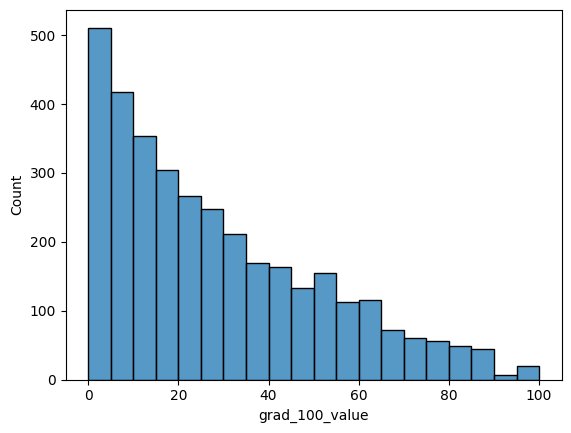

In [13]:
# Histogram
sns.histplot(df['grad_100_value'], bins = 20)

<Axes: xlabel='grad_100_value', ylabel='Density'>

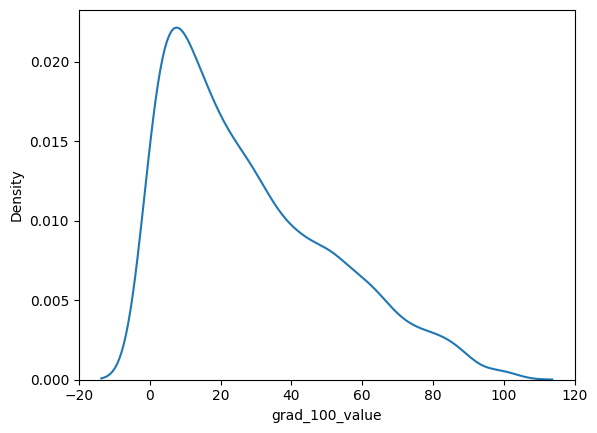

In [16]:
# Kernel density plot
sns.kdeplot(df['grad_100_value'])

<Axes: ylabel='grad_100_value'>

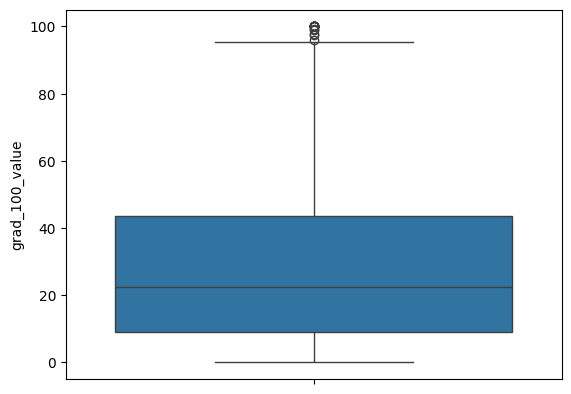

In [17]:
# Boxplot
sns.boxplot(y = df['grad_100_value'])

In [18]:
# Statistical description
print(df['grad_100_value'].describe())

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?


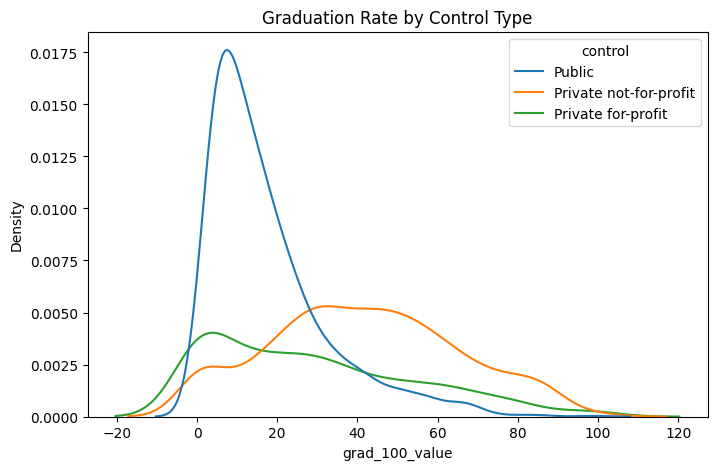

In [29]:
# Grouped Kernel Density Plot by Control
plt.figure(figsize = (8, 5))
sns.kdeplot(data = df, x = 'grad_100_value', hue = 'control')
plt.title("Graduation Rate by Control Type")
plt.show()

> In this KDE plot, I see that private not-for-profit institutions (orange line) seem to have the highest gradutation rates. The peak in the curve is higher than the others and concentrated at higher graduation rates (40-100%).

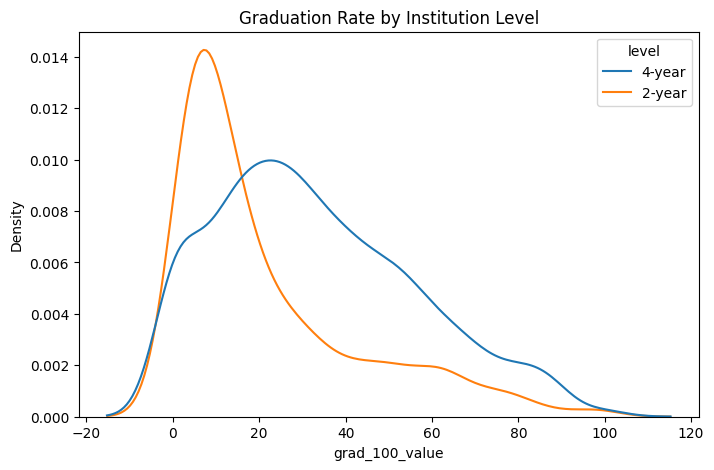

In [30]:
# Grouped Kernel Density Plot by Level
plt.figure(figsize = (8, 5))
sns.kdeplot(data = df, x = 'grad_100_value', hue = 'level')
plt.title("Graduation Rate by Institution Level")
plt.show()

> In this KDE plot, I see that 4-year institutions (blue line) tend to have higher graduation rates than 2-year institutions.

In [31]:
# Statistical Descriptions of Graduation Rates by Control & Level
df.groupby(['level', 'control'])['grad_100_value'].describe()

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

> From this statistical description, private not-for-profit institutions have the have the best gradutation rates for both 2-year and 4-year levels based on the means (41.9% for 2-year and 41.6 for 4-year).

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

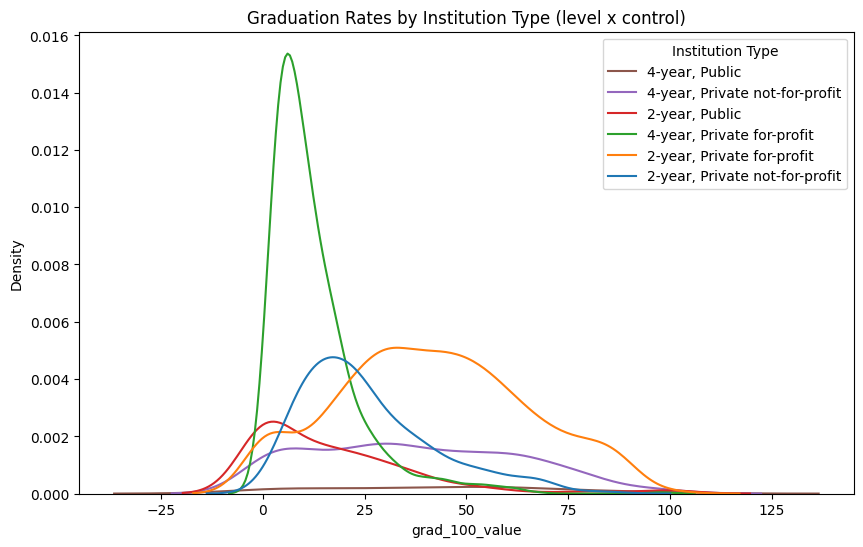

In [36]:
# Create a new variable
df['levelXcontrol'] = df['level']+', '+df['control']

# Grouped kernel density plot
plt.figure(figsize = (10, 6))
sns.kdeplot(data = df, x = 'grad_100_value', hue = 'levelXcontrol')
plt.title("Graduation Rates by Institution Type (level x control)")
plt.legend(title = "Institution Type", labels = df['levelXcontrol'].unique())
plt.show()

> 4-year private not-for-profit and 2-year private for-profit institutions appear to have the best graduation rates (but also vary across many graduation rates).

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

> The shape of the graph is skewed right because most students receive lower aid amounts and fewer students receive high aid amounts.

> But, in the KDE plot grouped by control we see that this is not true for private not-for-profit institutions where the aid is more evenly distributed.

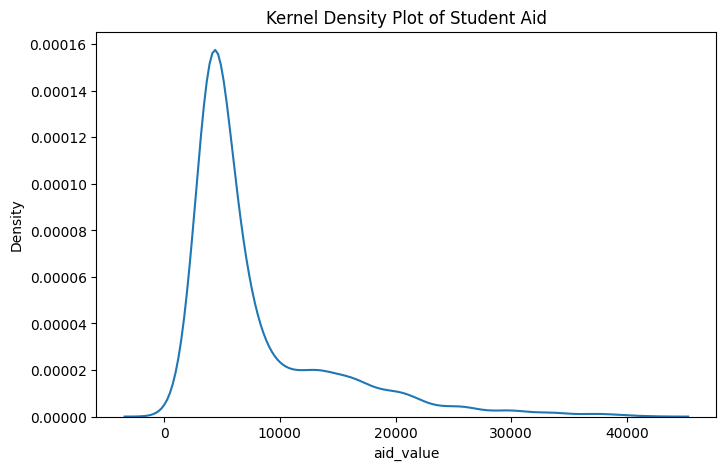

In [38]:
# Kernel density plot of aid_value
plt.figure(figsize = (8, 5))
sns.kdeplot(df['aid_value'])
plt.title("Kernel Density Plot of Student Aid")
plt.show()

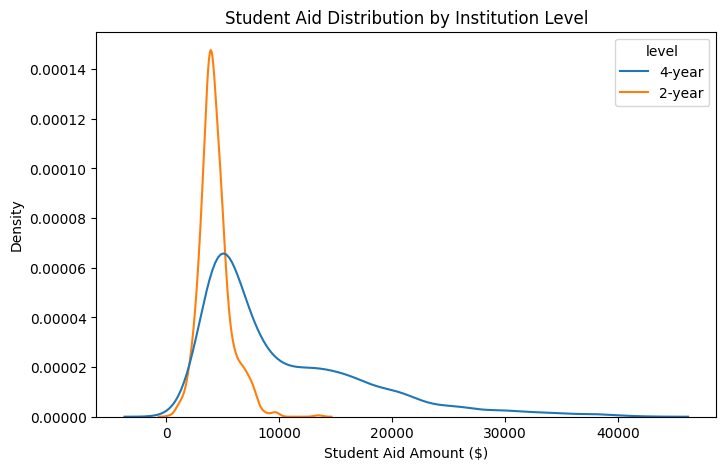

In [39]:
# Grouped KDE plot by level
plt.figure(figsize = (8, 5))
sns.kdeplot(data = df, x = 'aid_value', hue = 'level')
plt.xlabel("Student Aid Amount ($)")
plt.ylabel("Density")
plt.title("Student Aid Distribution by Institution Level")
plt.show()

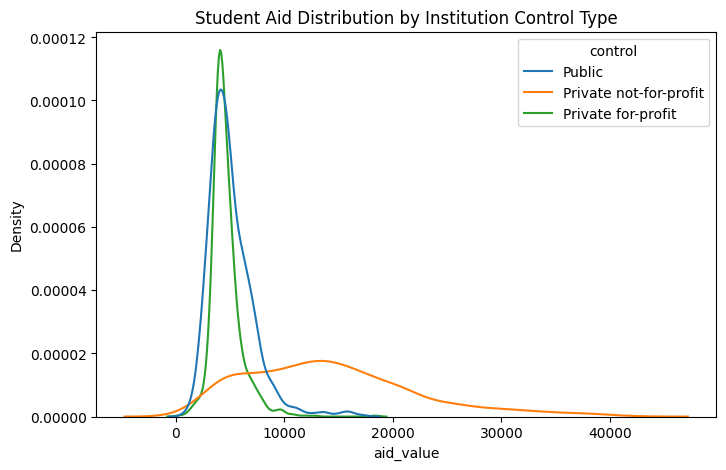

In [40]:
# Grouped KDE plot by control
plt.figure(figsize = (8, 5))
sns.kdeplot(data = df, x = 'aid_value', hue = 'control')
plt.title("Student Aid Distribution by Institution Control Type")
plt.show()

In [41]:
# Statistical summary of aid values (grouped by level and control)
df.groupby(['level', 'control'])['aid_value'].describe()

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

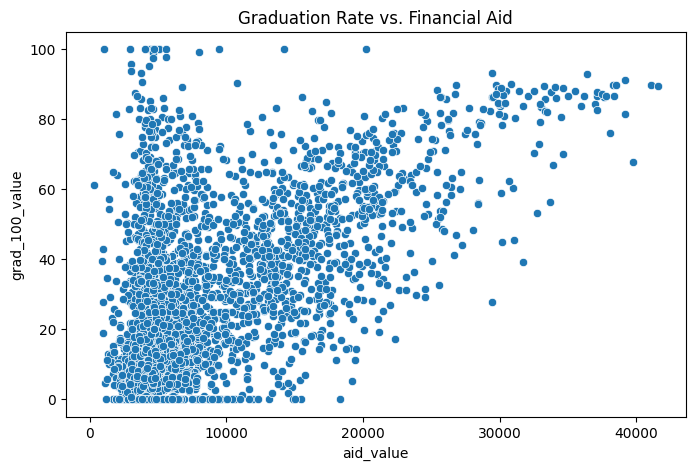

In [42]:
# Scatterplot of grad_100_value by aid_value
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = 'aid_value', y = 'grad_100_value')
plt.title("Graduation Rate vs. Financial Aid")
plt.show()

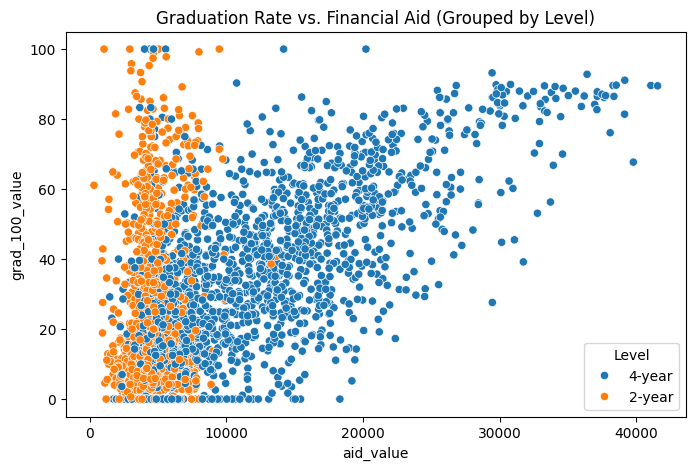

In [46]:
# Scatterplot grouping by level
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = 'aid_value', y = 'grad_100_value', hue = 'level')
plt.title("Graduation Rate vs. Financial Aid (Grouped by Level)")
plt.legend(title = "Level")
plt.show()

- 4-year institutions (blue points) show a strong positive correlation between financial aid and graduation rates. Higher financial air values are generally associated with higher graduaition rates.
- 2-year institutions (orange points) show little correlation. Overall aid values seem to be very low, most under $10,000, and aid value does not seem to affect graduation rates.

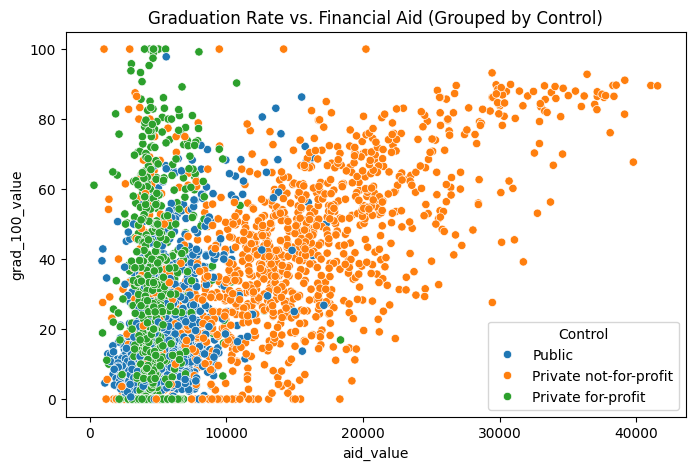

In [45]:
# Scatterplot grouping by control
plt.figure(figsize = (8, 5))
sns.scatterplot(data = df, x = 'aid_value', y = 'grad_100_value', hue = 'control')
plt.title("Graduation Rate vs. Financial Aid (Grouped by Control)")
plt.legend(title = "Control")
plt.show()

- Private not-for-profit institutions (orange points) show a strong positive trend. As aid increases, graduation rates also increase significantly. This suggests that private not-for-profit institutions use aid effectively to support higher graduation rates.
- Public institutions (blue points) show some correlation, but weaker than private not-for-profits. Graduation rates improve higher with aid, but not as strongly.
- Private for-profit institutions (green points) show very little correlation. Even when aid is given (mostly below $10,000) graduation rates vary highly from 0-100% with similar aid values.

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.